La croissance rapide de la collecte de données a contribué à la naissance à une nouvelle ère. Les données sont utilisées pour créer des systèmes plus efficaces, et c'est là que les systèmes de recommandation entrent en jeu. Les systèmes de recommandation sont un type de système de filtrage de l'information car ils améliorent la qualité des résultats de recherche et proposent des éléments plus pertinents par rapport à la recherche effectuée ou en lien avec l'historique de recherche de l'utilisateur.



Ils sont utilisés pour prédire la note ou la préférence qu'un utilisateur donnerait à un élément. Pratiquement toutes les grandes entreprises technologiques les ont appliqués sous une forme ou une autre : Amazon les utilise pour suggérer des produits aux clients, YouTube les utilise pour décider quelle vidéo lire ensuite en mode de lecture automatique, et Facebook les utilise pour recommander des pages à aimer et des personnes à suivre. De plus, des entreprises comme Netflix et Spotify dépendent fortement de l'efficacité de leurs moteurs de recommandation pour leur activité et leur succès.



Il existe essentiellement trois types de systèmes de recommandation :



**Filtrage démographique** : Ils offrent des recommandations généralisées à chaque utilisateur, basées sur la popularité et/ou le genre des films. Le système recommande les mêmes films aux utilisateurs ayant des caractéristiques démographiques similaires. Étant donné que chaque utilisateur est différent, cette approche est considérée comme trop simpliste. L'idée de base derrière ce système est que les films plus populaires et acclamés par la critique ont une probabilité plus élevée d'être appréciés par le public moyen.



**Filtrage basé sur le contenu** : Ils suggèrent des éléments similaires en fonction d'un élément spécifique. Ce système utilise les métadonnées des éléments, telles que le genre, le réalisateur, la description, les acteurs, etc., pour les films, afin de faire ces recommandations. L'idée générale derrière ces systèmes de recommandation est que si une personne aime un élément particulier, elle aimera également un élément similaire.



**Filtrage collaboratif** : Ce système met en relation des personnes ayant des intérêts similaires et fournit des recommandations basées sur cette correspondance. Les filtres collaboratifs ne nécessitent pas de métadonnées sur les éléments, contrairement à leurs homologues basés sur le contenu.



In [138]:
#!pip install pandas
#!pip install seaborn
#!pip install -U scikit-learn
#!pip install -U tensorflow

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns

Le premier dataset contient les éléments suivants :

**movie_id** - Un identifiant unique pour chaque film.

**cast** - Le nom des acteurs principaux et secondaires.

**crew** - Le nom du réalisateur, de l'éditeur, du compositeur, du scénariste, etc.

Le deuxième dataset contient les éléments suivants :

**budget** - Le budget alloué pour la réalisation du film.

**genre** - Le genre du film : action, comédie, thriller, etc.

**homepage** - Un lien vers la page d'accueil du film.

**id** - Il s'agit en fait de l'identifiant du film, correspondant à celui du premier ensemble de données.

**keywords** - Les mots-clés ou tags liés au film.

**original_language** - La langue dans laquelle le film a été réalisé.

**original_title** - Le titre original du film avant traduction ou adaptation.

**overview** - Une brève description du film.

**popularity** - Une quantité numérique spécifiant la popularité du film.

**production_companies** - La société de production du film.

**production_countries** - Le pays où le film a été produit.

**release_date** - La date de sortie du film.

**revenue** - Les revenus mondiaux générés par le film.

**runtime** - La durée du film en minutes.

**status** - "Sorti" ou "Rumeur".

**tagline** - La phrase d'accroche du film.

**title** - Le titre du film.

**vote_average** - La moyenne des évaluations reçues par le film.

**vote_count** - Le nombre de votes reçus par le film.

Unissons maintenant les deux ensembles de données sur la colonne 'id'.

In [140]:
df1=pd.read_csv('../data/tmdb_5000_credits.csv')
df2=pd.read_csv('../data/tmdb_5000_movies.csv')


In [141]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [142]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


- # Filtrage démographique

Avant de commencer nous avons besoin :

- D'une métrique pour évaluer ou noter les films
- Calculer le score pour chaque film
- Trier les scores et recommander le film le mieux noté aux utilisateurs.

Nous pouvons utiliser les notes moyennes des films comme score, mais cela ne serait pas assez équitable, car un film ayant une note moyenne de 8,9 avec seulement 3 votes ne peut pas être considéré comme meilleur qu'un film ayant une note moyenne de 7,8 mais avec 40 votes. Donc, j'utiliserai le classement pondéré d'IMDB (wr), qui est donné par :

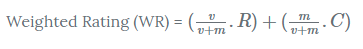

où,

v est le nombre de votes pour le film ;
m est le nombre minimum de votes requis pour figurer dans le classement ;
R est la note moyenne du film ; et
C est la note moyenne de l'ensemble du rapport
Nous avons déjà v (vote_count) et R (vote_average) et C peut être calculé comme suit :

In [143]:
C= df2['vote_average'].mean()
C

6.092171559442011

Ainsi, la note moyenne de tous les films est d'environ 6 sur une échelle de 10. La prochaine étape consiste à déterminer une valeur appropriée pour m, le nombre minimum de votes requis pour figurer dans le classement. Nous utiliserons le 90e percentile comme seuil. En d'autres termes, pour qu'un film figure dans le classement, il doit avoir plus de votes que au moins 90% des films de la liste.

In [144]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Maintenant, nous pouvons filtrer les films qui remplissent les critères du classement.

In [145]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

Nous constatons qu'il y a 481 films qui remplissent les critères pour figurer dans cette liste. Maintenant, nous devons calculer notre métrique pour chaque film qualifié. Pour ce faire, nous allons définir une fonction, weighted_rating(), et définir une nouvelle caractéristique "score", dont nous calculerons la valeur en appliquant cette fonction à notre df2Frame des films qualifiés.

In [146]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calcul basé sur la formule IMDB
    return (v/(v+m) * R) + (m/(m+v) * C)


In [147]:
#Définir une nouvelle caractéristique 'score' et calculer sa valeur avec la fonction weighted_rating()
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [148]:
#Trier les films en fonction du score calculé ci-dessus.
q_movies = q_movies.sort_values('score', ascending=False)

#Afficher les 15 meilleurs films.
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884



Nous avons créé notre premier système de recommandation (bien que très basique). Sous l'onglet "Trending Now" de ces systèmes, nous trouvons des films très populaires, et ils peuvent simplement être obtenus en triant le jeu de données par la colonne "popularité".

Text(0.5, 1.0, 'Popular Movies')

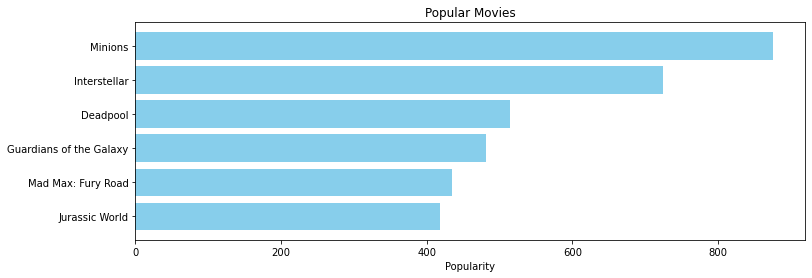

In [149]:

pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Il est important de noter que ces recommandations démographiques fournissent un classement général de films recommandés à tous les utilisateurs. Elles ne sont pas sensibles aux intérêts et aux goûts d'un utilisateur particulier. C'est à ce moment-là que nous passons à un système plus raffiné : la recommandation basée sur le contenu.

- # Recommandation basée sur le contenu

Dans ce système de recommandation, le contenu du film (synopsis, casting, équipe technique, mots-clés, slogan, etc.) est utilisé pour trouver sa similarité avec d'autres films. Ensuite, les films les plus susceptibles d'être similaires sont recommandés.

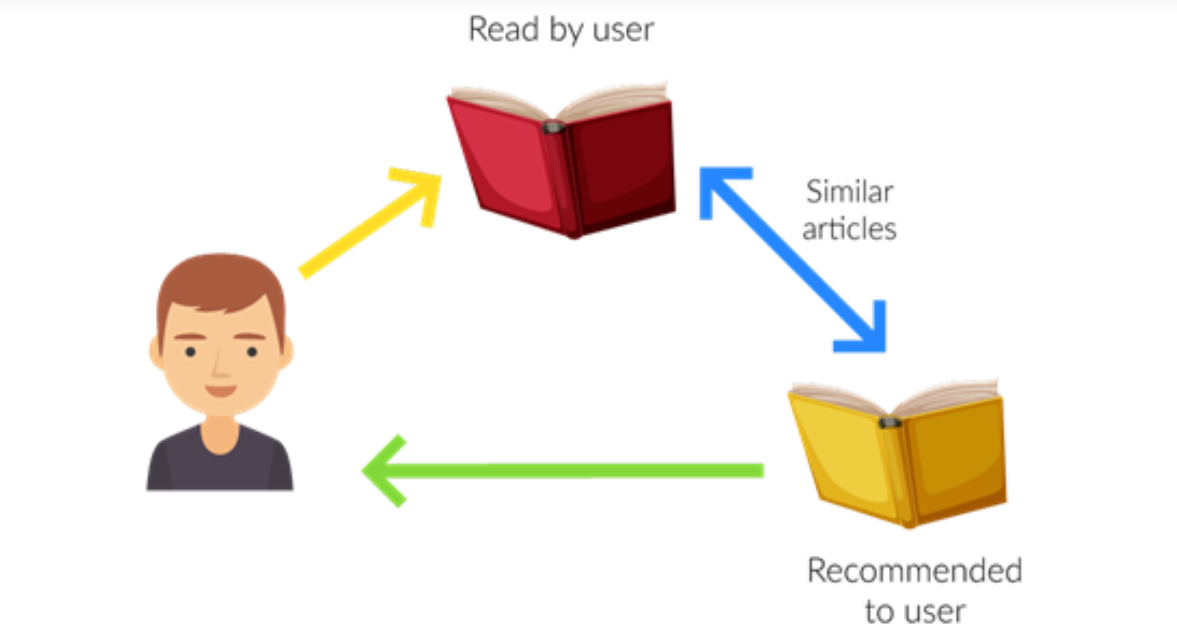

- # Recommandation basée sur la description de l'intrigue

Nous allons calculer des scores de similarité entre tous les films en fonction de leurs descriptions d'intrigue et recommander des films en fonction de ce score de similarité. La description de l'intrigue est donnée dans la fonction "overview" de notre ensemble de données. Jetons un coup d'œil aux données...

In [150]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

La fréquence des termes (TF) est la fréquence relative d'un mot dans un document, calculée en divisant le nombre d'occurrences du terme par le nombre total d'occurrences de tous les termes dans le document. L'inverse de la fréquence du document (IDF) est une mesure de l'importance relative d'un terme dans l'ensemble du corpus, calculée en prenant le logarithme du nombre total de documents divisé par le nombre de documents contenant le terme.

En combinant TF et IDF, nous obtenons une mesure de l'importance globale de chaque mot dans chaque document. Cela nous permet de construire une matrice TF-IDF où chaque colonne représente un mot du vocabulaire des descriptions d'intrigue, et chaque ligne représente un film.

L'utilisation de TF-IDF nous permet de réduire l'importance des mots fréquents dans les descriptions d'intrigue qui n'apportent pas beaucoup d'informations distinctives. Ainsi, les mots qui apparaissent fréquemment dans de nombreux films auront moins de poids lors du calcul de la similarité entre les films.

Heureusement, la bibliothèque scikit-learn propose une classe pratique appelée TfIdfVectorizer qui nous permet de calculer facilement la matrice TF-IDF en quelques lignes de code. Cela simplifie considérablement le processus et nous permet de passer rapidement à l'étape suivante de recommandation basée sur le contenu.

In [151]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Definir un TF-IDF Vectorizer Objet. Suprimer tout les mots anglais du style 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Renplacer NaN avec des chaine de caractere vide
df2['overview'] = df2['overview'].fillna('')

#Construire la matrice TF-IDF en adaptant et en transformant les données à l'aide de la classe TfidfVectorizer de sklearn 
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Sortie de la tfidf_matrix
tfidf_matrix.shape

(4803, 20978)


Après avoir construit notre matrice TF-IDF, nous constatons qu'elle contient plus de 20 000 mots différents pour décrire les 4 800 films de notre ensemble de données.

Avec cette matrice en main, nous pouvons désormais calculer un score de similarité. Il existe plusieurs mesures possibles, telles que la similarité euclidienne, la similarité de Pearson et la similarité cosinus. Il n'y a pas de réponse définitive quant à la meilleure mesure à utiliser. Différentes mesures fonctionnent bien dans différents scénarios, il est donc souvent judicieux d'expérimenter différentes métriques.

Dans notre cas, nous utiliserons la similarité cosinus pour calculer une quantité numérique qui représente la similarité entre deux films. Nous utilisons la similarité cosinus car elle est indépendante de la magnitude et relativement facile et rapide à calculer. Mathématiquement, elle est définie comme suit :

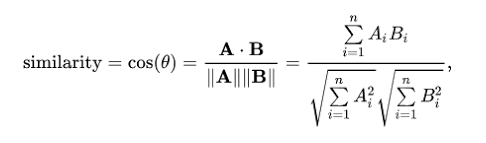

Étant donné que nous avons utilisé le vectoriseur TF-IDF, le produit scalaire entre deux vecteurs nous donnera directement le score de similarité cosinus. Par conséquent, nous utiliserons la fonction linear_kernel() de la bibliothèque scikit-learn au lieu de cosine_similarities(), car elle est plus rapide.

Maintenant, nous sommes prêts à passer à l'étape suivante, qui consiste à calculer la similarité entre tous les films de notre ensemble de données.

In [152]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Calculez la matrice de similarité cosinus
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


Nous allons définir une fonction qui prend en entrée le titre d'un film et renvoie une liste des 10 films les plus similaires. Pour cela, nous avons besoin d'une correspondance inversée des titres de films et des indices du DataFrame. En d'autres termes, nous avons besoin d'un mécanisme permettant d'identifier l'indice d'un film dans notre DataFrame de métadonnées, en fonction de son titre.

In [153]:
#Création d'une correspondance inversée des indices et des titres de films.
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

Nous sommes maintenant en mesure de définir notre fonction de recommandation. Voici les étapes que nous allons suivre :

- Obtenir l'indice du film à partir de son titre.

- Obtenir la liste des scores de similarité cosinus pour ce film particulier avec tous les autres films. 

- Convertir cette liste en une liste de tuples où le premier élément est la position du film et le deuxième élément est le score de similarité.

- Trier la liste de tuples précédente en fonction des scores de similarité ; c'est-à-dire le deuxième élément.

- Obtenir les 10 premiers éléments de cette liste. Ignorer le premier élément car il fait référence au film lui-même (le film le plus similaire à un film donné est le film lui-même).

- Retourner les titres correspondant aux indices des éléments les plus similaires.

In [154]:
# Fonction qui prend en entrée le titre d'un film et renvoie les films les plus similaires
def get_recommendations(title, cosine_sim=cosine_sim):
    # Obtenir les scores de similarité entre chaque paire de films, y compris le film donné
    idx = indices[title]

    # Obtenir les scores de similarité par paire de tous les films avec ce film
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Trier les films en fonction des scores de similarité
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtenir le top 10 des meilleurs films similaires
    sim_scores = sim_scores[1:11]

    # Obtenir les indices de ces films
    movie_indices = [i[0] for i in sim_scores]

    # Retourner le top 10 des meilleurs films similaires
    return df2['title'].iloc[movie_indices]

In [155]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [156]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

Bien que notre système ait fait un travail décent pour trouver des films avec des descriptions de scénario similaires, la qualité des recommandations n'est pas très bonne. "The Dark Knight Rises" renvoie tous les films de Batman, alors qu'il est plus probable que les personnes qui ont aimé ce film soient plus enclines à apprécier d'autres films de Christopher Nolan. C'est quelque chose qui ne peut pas être capturé par le système actuel.

- # Suggestions basé sur les crédits, les genres et les mots-clés:

Il va sans dire que la qualité de notre recommandateur serait améliorée avec l'utilisation de meilleures métadonnées. C'est exactement ce que nous allons faire dans cette section. Nous allons construire un recommandateur basé sur les métadonnées suivantes : les 3 principaux acteurs, le réalisateur, les genres associés et les mots-clés du scénario du film.

À partir des fonctionnalités de distribution, d'équipe et de mots-clés, nous devons extraire les trois acteurs les plus importants, le réalisateur et les mots-clés associés à ce film. Pour le moment, nos données sont présentes sous forme de listes "stringifiées", nous devons les convertir en une structure sûre et utilisable.

In [157]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)


Ensuite, nous écrirons des fonctions qui nous aideront à extraire les informations requises de chaque fonctionnalité.

In [158]:
# Obtenir le nom du réalisateur à partir de la fonctionnalité "crew". Si le réalisateur n'est pas répertorié, retournez NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [159]:
# Renvoie les 3 premiers éléments de la liste ou la liste entière, selon celle qui est la plus grande
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names

    return []

In [160]:
# Définissez de nouvelles fonctionnalités pour le réalisateur (director), la distribution (cast), les genres (genres) et les mots-clés (keywords) dans une forme adaptée
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [161]:
# Afficher les nouvelles caractéristiques des trois premiers films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"



La prochaine étape consisterait à convertir les noms et les instances de mots-clés en minuscules et à supprimer tous les espaces entre eux. Cela est fait afin que notre vectoriseur ne considère pas Johnny de "Johnny Depp" et "Johnny Galecki" comme étant le même.

In [162]:
# Fonction pour convertir toutes les chaînes de caractères en minuscules et supprimer les espaces des noms
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [163]:
# appliquer la fonction clean_data 
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)



Nous sommes maintenant en mesure de créer notre "metadata soup", qui est une chaîne de caractères contenant toutes les métadonnées que nous voulons fournir à notre vectoriseur (à savoir les acteurs, le réalisateur et les mots-clés).

In [164]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

Les prochaines étapes sont les mêmes que celles que nous avons suivies pour notre recommandeur basé sur la description du scénario. Une différence importante est que nous utilisons CountVectorizer() au lieu de TF-IDF. Cela s'explique par le fait que nous ne voulons pas réduire l'importance de la présence d'un acteur/réalisateur s'il a joué ou réalisé relativement plus de films. Cela n'a pas beaucoup de sens intuitif.

In [165]:
# Importer CountVectorizer et créer la count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [166]:
# Calculer la matrice de similarité cosinus basée sur la count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [167]:
# Réinitialiser l'index de notre DataFrame principal et construire une correspondance inversée comme précédemment
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

Nous pouvons maintenant réutiliser notre fonction get_recommendations() en passant la nouvelle matrice cosine_sim2 en tant que deuxième argument.

In [168]:
get_recommendations('The Dark Knight Rises', cosine_sim2)


65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [169]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

In [170]:


# Extraction des colonnes nécessaires pour la recommandation
metadata = df2[['title', 'cast', 'keywords','genres']]

# Remplissage des valeurs manquantes avec des chaînes vides
metadata = metadata.fillna('')
metadata


,title,cast,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"
...,...,...,...,...
4798,El Mariachi,"[carlosgallardo, jaimedehoyos, petermarquardt]","[unitedstates–mexicobarrier, legs, arms]","[action, crime, thriller]"
4799,Newlyweds,"[edwardburns, kerrybishé, marshadietlein]",[],"[comedy, romance]"
4800,"Signed, Sealed, Delivered","[ericmabius, kristinbooth, crystallowe]","[date, loveatfirstsight, narration]","[comedy, drama, romance]"
4801,Shanghai Calling,"[danielhenney, elizacoupe, billpaxton]",[],[]


In [171]:
# Fonction de conversion en minuscules et suppression des espaces
def preprocess_string(s):
    if isinstance(s, list):
        return ' '.join(s).lower().strip()
    else:
        return str(s).lower().strip()


In [172]:
# Prétraitement des colonnes de texte
metadata['title'] = metadata['title'].apply(preprocess_string)
metadata['cast'] = metadata['cast'].apply(preprocess_string)
metadata['genres'] = metadata['genres'].apply(preprocess_string)
metadata['keywords'] = metadata['keywords'].apply(preprocess_string)



In [173]:
# Création de la colonne 'soup' contenant toutes les informations
metadata['soup'] = metadata['cast'] + ' ' + metadata['keywords'] + ' ' + metadata['genres'] 

# Initialisation du vectoriseur
vectorizer = CountVectorizer(stop_words='english')

# Vectorisation de la colonne 'soup'
soup_matrix = vectorizer.fit_transform(metadata['soup'])

# Calcul de la similarité entre les films
similarity_matrix = cosine_similarity(soup_matrix)



In [174]:
# Fonction de recommandation
def get_recommendations(movie_title, keywords=None, cast=None,genres=None, top_n=10):
    movie_index = metadata[metadata['title'] == movie_title].index[0]
    similarity_scores = list(enumerate(similarity_matrix[movie_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_movies = [metadata.iloc[idx]['title'] for idx, _ in similarity_scores[1:top_n+1]]
    return top_movies



In [175]:
# Exemple d'utilisation
recommended_movies = get_recommendations('avatar', keywords='cultureclash, future, spacewar', cast='samworthington, zoesaldana, sigourneyweaver', genres='action, adventure, fantasy',top_n=10)
print("Recommended movies:", recommended_movies)


Recommended movies: ['clash of the titans', 'the mummy: tomb of the dragon emperor', 'the monkey king 2', "the sorcerer's apprentice", 'g-force', 'fantastic 4: rise of the silver surfer', 'the time machine', 'the scorpion king', "pirates of the caribbean: at world's end", 'spider-man 3']


In [185]:
import pickle
df2
df2.to_csv("../data/data.csv")
pickle.dump(vectorizer, open('model', 'wb'))

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [178]:
# Encodage des caractéristiques catégorielles
label_encoder = LabelEncoder()
df2['title_encoded'] = label_encoder.fit_transform(df2['title'])



In [179]:
# Création des ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df2['title_encoded'], df2['title_encoded'], test_size=0.2, random_state=42)



In [180]:
# Construction du modèle de recommandation
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [181]:
# Compilation du modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [182]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
121/121 [==============================] - 10s 43ms/step - loss: 26.2335 - accuracy: 0.0000e+00 - val_loss: 8.5466 - val_accuracy: 0.0000e+00
Epoch 2/10
121/121 [==============================] - 4s 35ms/step - loss: 8.4537 - accuracy: 0.0000e+00 - val_loss: 8.6571 - val_accuracy: 0.0000e+00
Epoch 3/10
121/121 [==============================] - 2s 20ms/step - loss: 8.4315 - accuracy: 0.0000e+00 - val_loss: 8.7567 - val_accuracy: 0.0000e+00
Epoch 4/10
121/121 [==============================] - 2s 21ms/step - loss: 8.4180 - accuracy: 5.2056e-04 - val_loss: 8.8510 - val_accuracy: 0.0000e+00
Epoch 5/10
121/121 [==============================] - 2s 21ms/step - loss: 8.4001 - accuracy: 5.2056e-04 - val_loss: 8.9414 - val_accuracy: 0.0000e+00
Epoch 6/10
121/121 [==============================] - 2s 20ms/step - loss: 8.3867 - accuracy: 5.2056e-04 - val_loss: 9.0287 - val_accuracy: 0.0000e+00
Epoch 7/10
121/121 [==============================] - 3s 21ms/step - loss: 8.3756 - accuracy

In [183]:
# Utilisation du modèle pour les recommandations
def get_recommendations(movie_title):
    encoded_title = label_encoder.transform([movie_title.lower().strip()])
    predictions = model.predict(encoded_title)
    top_n_indices = predictions.argsort()[0][-10:][::-1]
    top_n_movies = label_encoder.inverse_transform(top_n_indices)
    return top_n_movies.tolist()


In [184]:
# Exemple d'utilisation
recommended_movies = get_recommendations('Avatar')
print("Recommended movies:", recommended_movies)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\_encode.py", line 182, in _encode
    ret = (uniques,)
  File "c:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\_encode.py", line 126, in _map_to_integer
  File "c:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\_encode.py", line 126, in <listcomp>
  File "c:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\_encode.py", line 120, in __missing__
    missing_values: MissingValues
KeyError: 'avatar'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\nicol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\nicol\AppData\Local\Temp\ipykernel_18384\3290133784.py", line 2, in <cell line: 2>
    recommended_movies = get_recommendations('Avatar')
  File "C:\Users\nicol\AppData\Local\Temp\ipykernel_18384